In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
book = pd.read_csv("C:\\Users\\DELL\\Association\\book.csv")

# Finding the frequent items

In [4]:
frequent_itemsets = apriori(book,min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.shape

(224, 2)

# Most Frequent item sets based on support

In [6]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

<ipython-input-7-48e44dd25921>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');


Text(0, 0.5, 'support')

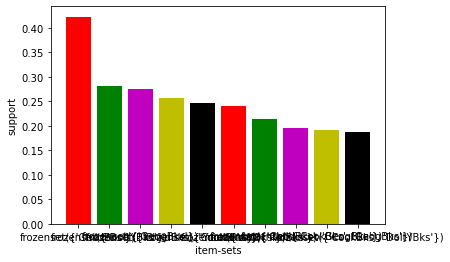

In [7]:
import matplotlib.pylab as plt
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(1054, 9)

In [9]:
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

#  To eliminate Redudancy in Rules

In [11]:
def to_list(i):
    return (sorted(list(i)))

In [12]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [13]:
ma_X = ma_X.apply(sorted)

In [14]:
rules_sets = list(ma_X)

In [15]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 

In [16]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [17]:
# Sorting them with respect to list and getting top 10 rules 

In [18]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
565,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
897,"(ItalCook, ItalAtlas)",(ItalArt),0.0230,0.0485,0.0125,0.543478,11.205737,0.011385,2.084238
962,"(ItalCook, Florence)",(ItalArt),0.0175,0.0485,0.0095,0.542857,11.192931,0.008651,2.081406
810,"(ChildBks, ItalArt)",(ItalAtlas),0.0360,0.0370,0.0145,0.402778,10.885886,0.013168,1.612465
971,(ItalArt),"(ItalAtlas, DoItYBks)",0.0485,0.0190,0.0095,0.195876,10.309278,0.008578,1.219962
1005,"(YouthBks, ItalAtlas)",(ItalArt),0.0175,0.0485,0.0085,0.485714,10.014728,0.007651,1.850139


In [19]:
# Perform algorithm for different support, connfidence value and max length

In [20]:
frequent_itemsets1 = apriori(book, min_support=0.007, max_len=4,use_colnames = True)

In [21]:
# Most Frequent item sets based on support

In [22]:
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)

<ipython-input-23-298a32eca15c>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets1.support[1:11],color='rgmyk');


Text(0, 0.5, 'support')

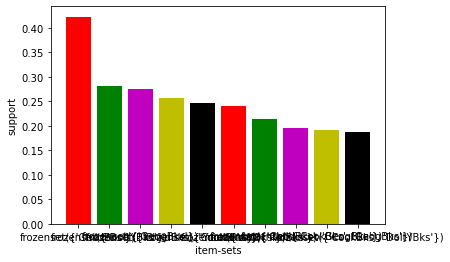

In [23]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets1.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets1.itemsets[1:11]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [25]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False,inplace=True)

In [26]:
frequent_itemsets2 = apriori(book, min_support=0.009, max_len=5,use_colnames = True)

In [27]:
# Most Frequent item sets based on support 

In [28]:
frequent_itemsets2.sort_values('support',ascending = False,inplace=True)

<ipython-input-30-ecb149ec78ec>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets2.support[1:11],color='rgmyk');


Text(0, 0.5, 'support')

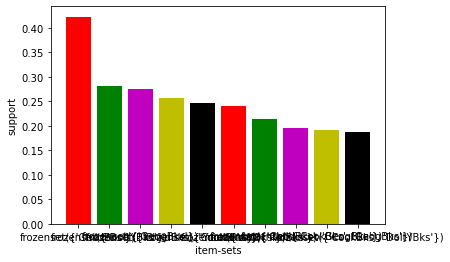

In [30]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets2.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets2.itemsets[1:11]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [32]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False,inplace=True)

# As min lenth value is changing the rules is changing.
#rules =1054
#rules1=4556
#rules2=9164